<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2023/blob/main/Unidad_2/02_Arboles_binarios_de_busqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

En esta sesión veremos algunas operaciones y algoritmos que se pueden hacer en un árbol binario de búsqueda (BST por sus siglas en inglés), por ejemplo buscar e insertar elementos, así como construir un BST a partir de una lista de números dada.

Para trabajar con un BST, lo primero que debemos hacer es definir la estructura de nuestros nodos en el árbol, donde cada nodo tiene un valor asignado, y dos apuntadores, uno para su hijo izquierdo y otro para su hijo derecho.

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"

In [3]:
n = Node(4)
n.left = Node(3)
n.right = Node(5)
print(n)

Valor: 4
Izquierda: 3
Derecha: 5


# Inserción y búsqueda

Veamos las primeras dos operaciones básicas en un BST: buscar elementos, e insertar elementos. Para insertar elementos en un BST, procedemos de una forma muy similar a como se hace una búsqueda binaria: si queremos insertar el valor `x` y estamos en el nodo `n`, comparamos `n.value` con `x`, para lo cual existen tres casos posibles:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, lo volvemos `x`.
* `x > n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, lo volvemos `x`.
* `x = n.value`: No hacemos nada, ya que no puede haber elementos duplicados en el BST.

In [4]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
    
    def insert(self, x):
        if self.val == x:
            return

        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        else:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)

In [5]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)
root.left.insert(5)
print(root.right)

Valor: 1
Izquierda: None
Derecha: 2


Para buscar un elemento, el procedimiento es prácticamente el mismo que en la inserción:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, significa que `x` no está en el árbol.
* `x > n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, significa que `x` no está en el árbol.
* `x = n.value`: `n` es el nodo que buscamos, así que lo regresamos.

In [6]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
       
    
    def insert(self, x):
        if x == self.val:
            return
        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        elif x > self.val:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)
                
                
    def search(self, x):
        if self.val == x:
            return self
        
        elif x < self.val:
            if self.left is None:
                return
            else:
                return self.left.search(x)
            
        elif x > self.val:
            if self.right is None:
                return
            else:
                return self.right.search(x)

In [7]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)

root.search(2)

Valor: 2
Izquierda: None
Derecha: None

# Recorridos

Veremos ahora tres de las formas más comunes de recorrer un BST: in-order y pre-order traversal. Usaremos el siguiente árbol:

```
          4
        /    \
       2      6
      / \    / \
     1   3  5   7
    /            \
   0              8
```   

In [8]:
tree = Node(4)
tree.insert(2)
tree.insert(1)
tree.insert(0)
tree.insert(3)
tree.insert(6)
tree.insert(5)
tree.insert(7)
tree.insert(8)

## In-order

In-order traversal nos permite rescatar la lista de números de manera ordenada, visita primero todo lo que hay a la izquierda de la raíz, después la raíz y posteriormente el hijo derecho, haciendo esto de manera recursiva. Esto nos será muy útil para después poder eliminar elementos en un árbol binario de búsqueda. Veamos un ejemplo de un in-order traversal en un árbol de este tipo.

In [9]:
def in_order(root):
    if root is not None:
        in_order(root.left)
        print(root.val) # aquí es donde visitamos
        in_order(root.right)
    else:
        return

in_order(tree)

0
1
2
3
4
5
6
7
8


Notemos que con este tipo de ideas podemos encontrar el mínimo valor y el máximo valor en un árbol binario de búsqueda.

## Pre-order

Consiste en visitar el nodo actual, después lo que hay en su hijo izquierdo y después en su hijo derecho. Podemos notar que es un recorrido particular de un recorrido de DFS en un árbol.

In [10]:
def pre_order(root):
    if root is not None:
        print(root.val)
        pre_order(root.left)
        pre_order(root.right)
    else:
        return

pre_order(tree)

4
2
1
0
3
6
5
7
8


## Post-order

Consiste en visitar el subárbol izquierdo, luego el derecho, y finalmente el nodo actual. 

In [11]:
def post_order(root):
    if root is not None:
        pre_order(root.left)
        pre_order(root.right)
        print(root.val)
    else:
        return

post_order(tree)

2
1
0
3
6
5
7
8
4


# Graficado

Nótese que podemos utilizar cualquiera de las caminatas anteriores para construir una gráfica de `networkx` a partir de nuestro árbol: cada vez que visitamos un nodo, lo añadimos a él y a sus hijos a la gráfica, junto con las aristas que los unen:

In [12]:
def build_graph(root, g=None):
    if g is None:
        g = nx.Graph()
    
    if root is not None:
        build_graph(root.left, g)
        g.add_node(root.val)
        if root.left is not None:
            g.add_edge(root.val, root.left.val)
        if root.right is not None:
            g.add_edge(root.val, root.right.val)
        build_graph(root.right, g)
    return g

Para asegurarnos que al momento de graficar se vea como un árbol, usamos el layout `dot` de `graphviz`:

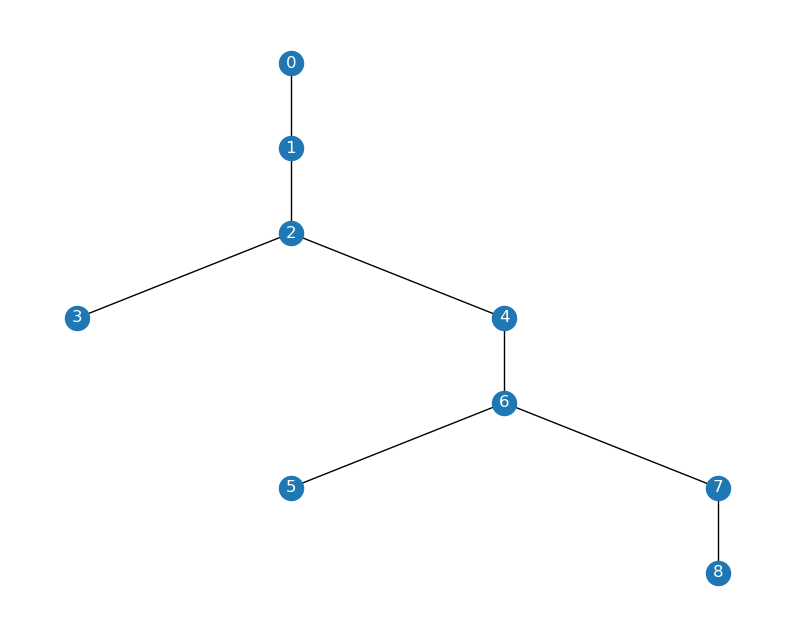

In [13]:
g = build_graph(tree)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos, font_color="white")

# Borrado

Veamos ahora cómo eliminar un nodo $N$ de un BST. Notemos que hay tres casos posibles:


*   Si $N$ no tiene hijos, es suficiente con eliminar dicho nodo.
*   Si $N$ tiene únicamente un hijo, reemplazamos el nodo $N$ por su hijo.
*   Si $N$ tiene dos hijos, tenemos que reacomodar de una manera más sofisticada los nodos para que siga siendo un BST. Esto podemos hacerlo con el siguiente algoritmo:

    1. Encontramos el siguiente nodo con un valor mayor a $N$, i.e., su sucesor en in-order traversal; llámese $S$. Nótese que este nodo es el que tiene menor valor del subárbol derecho.  
    2. Reemplazamos el valor de $N$ con el de $S$.
    3. Borramos $S$, esto último se puede hacer sin problemas pues el sucesor de un nodo con dos hijos es necesariamente una hoja, ya que es el valor mínimo en el subárbol con raíz en su hijo derecho.

Para hacer esto, necesitaremos una función que nos permita encontrar el valor mínimo en un sub árbol a partir de cierto nodo. 

In [14]:
def min_value(root):
    if root is not None:
        while root.left is not None:
            root = root.left
        return root
    else:
        return None

Ahora, implementamos el algoritmo de borrado de modo que si pedimos eliminar un valor que no existe, el BST no se vea modificado y no haya problemas.

In [15]:
def delete(root, x):
    if root is not None:
        if root.val == x:
            if root.left is None: # Tiene a lo más un hijo, el derecho
                new = root.right
                root = None # Vaciamos el nodo root
                return new
            elif root.right is None: # Tiene sólo el hijo izquierdo
                new = root.left
                root = None
                return new
            else: # Tiene ambos hijos
                new = min_value(root.right)
                root.val = new.val
                root.right = delete(root.right, new.val)
                return root
        else: 
            if root.val < x:
                root.right = delete(root.right, x)
            else:
                root.left = delete(root.left, x)
            return root
    else:
        return None


# rd = Node(L[0])
# for l in L[1:]:
#     rd.insert(l)

delete(tree, 4)
in_order(tree)

0
1
2
3
5
6
7
8


# Reconstrucción

Veamos un último ejemplo. Supongamos que se tiene una lista no vacía de enteros distintos $L$, tal que $L$ es el pre-order de un árbol binario de búsqueda, nuestro objetivo es reconstruir dicho BST.

Una primer idea para atacar este problema sería hacer lo que ya hicimos previamente, ir agregando elemento por elemento usando nuestra función de insertar, sin ambargo, hacer esto nos puede tomar $O(n^2)$ en tiempo (si nuestro árbol resulta ser un camino). 

Optimizaremos nuestro algoritmo usando una pila. Comenzamos con una pila $P$ a la que agregamos el primer valor de la lista $L$, el cual también lo haremos la raíz de nuestro BST. Posteriormente vamos a iterar sobre los elementos de $L$, y tenemos dos casos:

*   Si el elemento actual es menor que el elemento en la cima de la pila, hacemos que este elemento sea hijo izquierdo de la cima, y agregamos el nodo a la pila.
*   Si el elemento actual es mayor que el elemento en la cima de la pila, removemos dicha cima de la pila, y continuamos removiendo elementos hasta llegar a que la pila sea vacía o que el elemento en la cima sea mayor que el actual, y hacemos que el elemento actual sea el hijo derecho del último elemento que se removió de la pila. Posteriormente agregamos el nodo con valor el elemento actual a la pila.

Veamos una implementación de este algoritmo.



In [22]:
from collections import deque

def construct_BST(L):
    root = Node(L[0])
    queue = deque()
    queue.append(root)
    for i in range (1, len(L)):
        if L[i] < queue[-1].val:
            curr = Node(L[i])
            queue[-1].left = curr
            queue.append(curr)
        else:
            curr = Node(L[i])
            last = queue[-1]
            while queue:
                if(L[i] < queue[-1].val):
                    break
                else:
                    last = queue[-1]
                    queue.pop()
            last.right = curr
            queue.append(curr)
    return root

BST_from_L = construct_BST([2, 1, 7, 4, 3, 6, 5, 8])
print("In order:")
in_order(BST_from_L)
print('Pre order:')
pre_order(BST_from_L)

In order:
1
2
3
4
5
6
7
8
Pre order:
2
1
7
4
3
6
5
8


# Ejercicios

## Ejercicio 1

Tenemos un BST con las siguientes reglas:

* `root.val = 0`
* Si `node.left != None` (donde `node` es un nodo arbitrario, incluyendo la raíz), y `node.val = x`, entonces `node.left.val = 2*x + 1`.
* Si `node.right != None`, y `node.val = x`, entonces `node.right.val = 2*x + 2`.

Asumiendo que tienes un árbol que sigue estas reglas (definido usando la clase `Node` previamente vista), y que no sabes el valor de ninguno de sus nodos, escribe una función que actualice el valor de todos los nodos.

Pruébalo con el siguiente árbol:

```
    -1
   /  \
  -1  -1
 /  \
-1  -1
```

In [23]:
root = Node(-1)
root.left = Node(-1)
root.left.left = Node(-1)
root.left.right = Node(-1)
root.right = Node(-1)

Tu función debe de actualizar los valores a:

```
     0
   /  \
  1    2
 /  \
3    4
```

*Aquí va la explicación de tu algoritmo*

In [24]:
# Aquí va tu código

## Ejercicio 2

Escribe una función para verificar si un árbol binario es un BST (i.e., que se cumplen las relaciones de menor que/mayor que para cada sub-árbol).

*Aquí va la explicación de tu algoritmo*

In [25]:
# Aquí va tu código

## Ejercicio 3

En un BST, los valores de dos nodos se intercambiaron accidentalmente. Escribe una función que encuentre estos dos nodos, y regrese el árbol a su estado original.

Pruébalo con el siguiente árbol:

```
          4
        /    \
       2      6
      / \    / \
     7   3  5   1
    /            \
   0              8
```   

In [26]:
tree = Node(4)
tree.insert(2)
tree.insert(1)
tree.insert(0)
tree.insert(3)
tree.insert(6)
tree.insert(5)
tree.insert(7)
tree.insert(8)

El árbol correcto es:

```
          4
        /    \
       2      6
      / \    / \
     1   3  5   7
    /            \
   0              8
```   